<a href="https://colab.research.google.com/github/fanqingsong/code_snippet/blob/master/%E2%80%9Cfcc_sms_text_classification_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 453.2MB 30kB/s 
     |████████████████████████████████| 4.2MB 27.5MB/s 
     |████████████████████████████████| 471kB 38.3MB/s 
     |████████████████████████████████| 5.9MB 31.8MB/s 
     |████████████████████████████████| 4.0MB 30.9MB/s 
     |████████████████████████████████| 1.3MB 30.8MB/s 
     |████████████████████████████████| 4.9MB 26.7MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Found existing installation: gast 0.3.3
    Uninstal

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-05-11 01:51:51--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.04s   

2021-05-11 01:51:51 (8.71 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2021-05-11 01:51:51--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [ ]:
train_df=pd.read_table(train_file_path, header=None)
test_df=pd.read_table(test_file_path, header=None)

head_data = train_df.head()
print(type(head_data))
print(head_data)

print("---- index ------")
print(head_data.index)

print("---- iloc ------")
print(head_data.iloc[0])

print("---- columns ------")
print(head_data.columns)

print("---- columns[0] ------")
print(head_data[0])

<class 'pandas.core.frame.DataFrame'>
     0                                                  1
0  ham  ahhhh...just woken up!had a bad dream about u ...
1  ham                           you can never do nothing
2  ham  now u sound like manky scouse boy steve,like! ...
3  ham  mum say we wan to go then go... then she can s...
4  ham  never y lei... i v lazy... got wat? dat day ü ...
---- index ------
RangeIndex(start=0, stop=5, step=1)
---- iloc ------
0                                                  ham
1    ahhhh...just woken up!had a bad dream about u ...
Name: 0, dtype: object
---- columns ------
Int64Index([0, 1], dtype='int64')
---- columns[0] ------
0    ham
1    ham
2    ham
3    ham
4    ham
Name: 0, dtype: object


In [ ]:
train_x = train_df[1]
train_y = train_df[0]

test_x = test_df[1]
test_y = test_df[0]

print(train_x)
print(train_y)

0       ahhhh...just woken up!had a bad dream about u ...
1                                you can never do nothing
2       now u sound like manky scouse boy steve,like! ...
3       mum say we wan to go then go... then she can s...
4       never y lei... i v lazy... got wat? dat day ü ...
                              ...                        
4174    just woke up. yeesh its late. but i didn't fal...
4175    what do u reckon as need 2 arrange transport i...
4176    free entry into our £250 weekly competition ju...
4177    -pls stop bootydelious (32/f) is inviting you ...
4178    tell my  bad character which u dnt lik in me. ...
Name: 1, Length: 4179, dtype: object
0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
4174     ham
4175     ham
4176    spam
4177    spam
4178     ham
Name: 0, Length: 4179, dtype: object


In [ ]:
print(test_x)
print(test_y)

0       i am in hospital da. . i will return home in e...
1              not much, just some textin'. how bout you?
2       i probably won't eat at all today. i think i'm...
3       don‘t give a flying monkeys wot they think and...
4                                     who are you seeing?
                              ...                        
1387    true dear..i sat to pray evening and felt so.s...
1388                 what will we do in the shower, baby?
1389    where are you ? what are you doing ? are yuou ...
1390    ur cash-balance is currently 500 pounds - to m...
1391    not heard from u4 a while. call 4 rude chat pr...
Name: 1, Length: 1392, dtype: object
0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
1387     ham
1388     ham
1389     ham
1390    spam
1391    spam
Name: 0, Length: 1392, dtype: object


In [ ]:
train_y_index = train_y.replace(['ham','spam'],[0,1])
print(train_y_index)

test_y_index = test_y.replace(['ham','spam'],[0,1])

0       0
1       0
2       0
3       0
4       0
       ..
4174    0
4175    0
4176    1
4177    1
4178    0
Name: 0, Length: 4179, dtype: int64


In [ ]:
print(train_x.shape)

print(test_x.shape)

(4179,)
(1392,)


In [ ]:
cat_count = train_y.value_counts()
print(cat_count)

ham_count = cat_count["ham"]
print(cat_count["ham"])

spam_count = cat_count["spam"]
print(cat_count["spam"])

ham     3619
spam     560
Name: 0, dtype: int64
3619
560


In [ ]:
print(type(train_y.unique()))
train_y.unique()

<class 'numpy.ndarray'>


array(['ham', 'spam'], dtype=object)

In [ ]:
test_y.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
total = ham_count + spam_count

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / ham_count)*(total)/2.0 
weight_for_1 = (1 / spam_count)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

class_weight = {0: weight_for_0, 1: weight_for_1}

Weight for class 0: 0.58
Weight for class 1: 3.73


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_features = vectorizer.fit_transform(train_x)
train_x_features = train_x_features.todense()
print(type(train_x_features))
print(train_x_features.shape)
print(train_x_features.shape[1])
print(train_x_features[0])


test_x_features = vectorizer.transform(test_x)
test_x_features = test_x_features.todense()
print(test_x_features.shape)

<class 'numpy.matrix'>
(4179, 7445)
7445
[[0. 0. 0. ... 0. 0. 0.]]
(1392, 7445)


In [193]:
import keras
import tensorflow as tf


model = keras.Sequential()

model.add(keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(train_x_features.shape[1],)))
model.add(keras.layers.Dense(8, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))


metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=metrics)
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 16)                119136    
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 9         
Total params: 119,281
Trainable params: 119,281
Non-trainable params: 0
_________________________________________________________________


In [194]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


In [195]:
history = model.fit(train_x_features, train_y_index,
                    epochs=10,
                    verbose=True,
                    validation_data=(test_x_features, test_y_index),
                    class_weight=class_weight)


Epoch 1/10
131/131 [==============================] - 4s 13ms/step - loss: 0.2406 - fn: 31.0000 - fp: 422.0000 - tn: 3197.0000 - tp: 529.0000 - precision: 0.5563 - recall: 0.9446 - prc: 0.9167 - val_loss: 0.1458 - val_fn: 5.0000 - val_fp: 66.0000 - val_tn: 1139.0000 - val_tp: 182.0000 - val_precision: 0.7339 - val_recall: 0.9733 - val_prc: 0.9683
Epoch 2/10
131/131 [==============================] - 1s 6ms/step - loss: 0.0330 - fn: 7.0000 - fp: 26.0000 - tn: 3593.0000 - tp: 553.0000 - precision: 0.9551 - recall: 0.9875 - prc: 0.9916 - val_loss: 0.0773 - val_fn: 8.0000 - val_fp: 30.0000 - val_tn: 1175.0000 - val_tp: 179.0000 - val_precision: 0.8565 - val_recall: 0.9572 - val_prc: 0.9713
Epoch 3/10
131/131 [==============================] - 1s 7ms/step - loss: 0.0063 - fn: 1.0000 - fp: 6.0000 - tn: 3613.0000 - tp: 559.0000 - precision: 0.9894 - recall: 0.9982 - prc: 0.9980 - val_loss: 0.0547 - val_fn: 12.0000 - val_fp: 11.0000 - val_tn: 1194.0000 - val_tp: 175.0000 - val_precision: 0.940

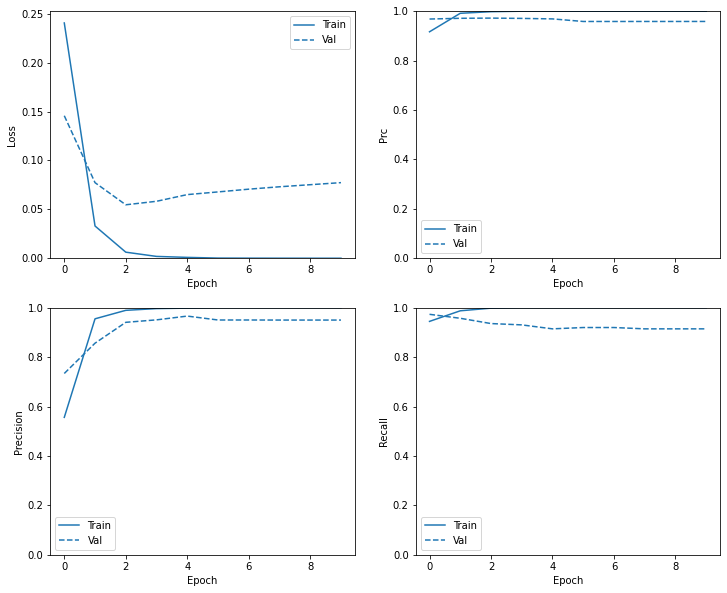

In [196]:
plot_metrics(history)


In [174]:
model.evaluate(train_x_features, train_y_index, verbose=True)

131/131 [==============================] - 0s 3ms/step - loss: 0.0013 - fn: 0.0000e+00 - fp: 1.0000 - tn: 3618.0000 - tp: 560.0000 - precision: 0.9982 - recall: 1.0000


[0.0012663878733292222, 0.0, 1.0, 3618.0, 560.0, 0.9982174634933472, 1.0]

In [184]:
model.evaluate(test_x_features, test_y_index, verbose=True)


44/44 [==============================] - 0s 3ms/step - loss: 0.0949 - fn: 17.0000 - fp: 8.0000 - tn: 1197.0000 - tp: 170.0000 - precision: 0.9551 - recall: 0.9091


[0.09490098804235458,
 17.0,
 8.0,
 1197.0,
 170.0,
 0.9550561904907227,
 0.9090909361839294]

In [185]:

test_pred = model.predict(test_x_features)
print(test_pred)

test_pred_classes = model.predict_classes(test_x_features)
print(test_pred_classes)

[[4.1661790e-09]
 [2.9718526e-06]
 [5.6104748e-09]
 ...
 [4.5449917e-07]
 [9.9999976e-01]
 [1.4192253e-01]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:449: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [186]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  features = [pred_text]

  features_tfidf = vectorizer.transform(features)

  features_tfidf = features_tfidf.todense()

  category_probs = model.predict(features_tfidf)

  category_indexs = model.predict_classes(features_tfidf)

  pred_prob = category_probs[0][0]
  # print(pred_prob)

  pred_index = category_indexs[0][0]
  # print(pred_index)

  cate_dict = {0: "ham", 1: "spam"}
  pred_text = cate_dict[pred_index]
  # print(pred_text)

  return (pred_prob, pred_text)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

(1.5891055e-07, 'ham')


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:449: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [197]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      print("-----------------------------")
      print(f"msg: {msg}")
      print(f"ans: {ans}")
      print("not passed, your prediction:", prediction[1])
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:449: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:449: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

You passed the challenge. Great job!


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:449: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
